In [2]:
# import requests

# # URL of the file
# url = 'https://www.kaggle.com/datasets/zalando-research/fashionmnist/download?datasetVersionNumber=4'

# # Send an HTTP GET request
# response = requests.get(url)

# # Save the file to your system
# with open('archive.zip', 'wb') as f:
#     f.write(response.content)

# print('File downloaded successfully!')


File downloaded successfully!


In [23]:
import pandas as pd
df=pd.read_csv('fashion-mnist_train.csv')
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Display the first image in training data
  
Label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

for i in range(len(df)):
    df.loc[i,"Label"]= Label_dict[df.loc[i, "label"]]
df.head()
    


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Label
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pullover
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ankle boot
2,6,0,0,0,0,0,0,0,5,0,...,0,0,30,43,0,0,0,0,0,Shirt
3,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,T-shirt/top
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dress


```markdown
## P.3.1 Data Preprocessing

### Visualize the first 25 images with their appropriate label

The following code visualizes the first 25 images from the dataset along with their corresponding labels:


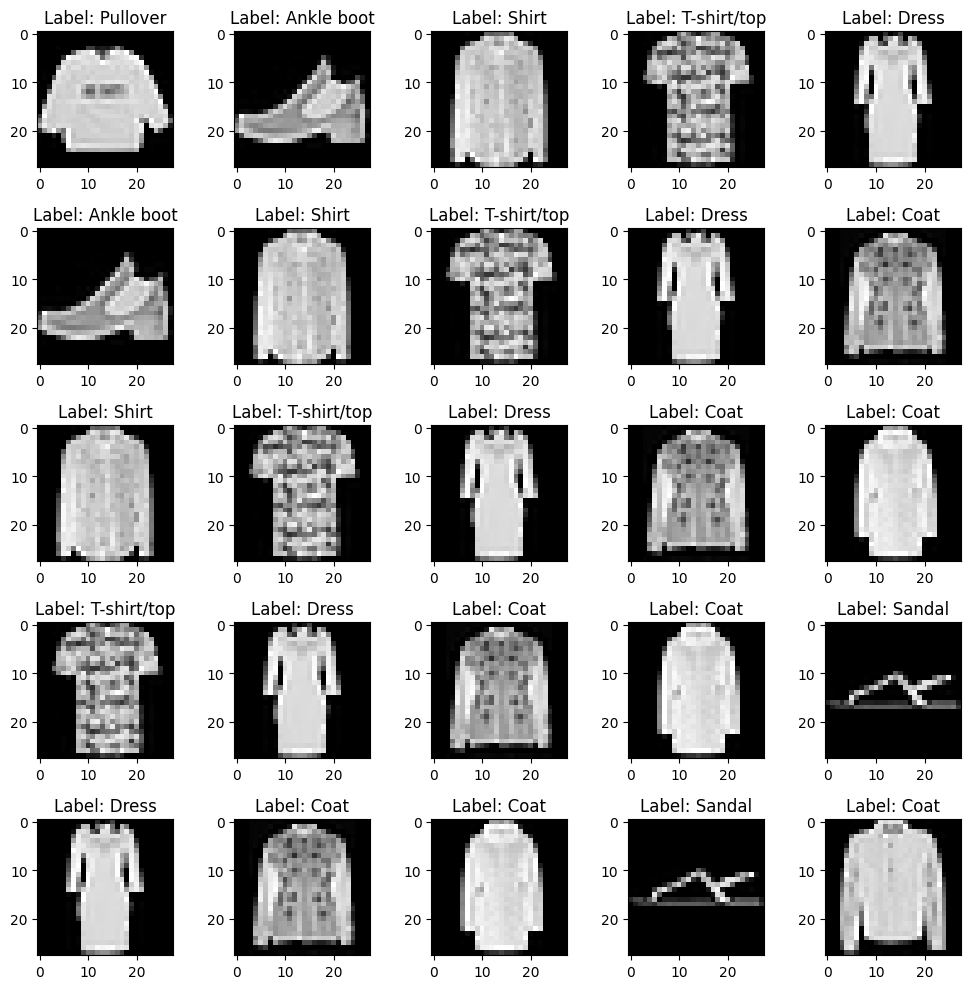

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Loop over each subplot and add the index (q)
q = 1
for i in range(5):
    for j in range(5):
       
        array = np.array(df.iloc[j+i, 1:-1].values,dtype='uint8')

        axes[i, j].imshow(array.reshape(28, 28), cmap='gray')
        axes[i, j].set_title(f'Label: {df.loc[j+i, "Label"]}')

plt.tight_layout()
plt.show()


```markdown
## 2. Perform Standard Scaling across the input features


```

## MIN-MAX Scaling
$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$


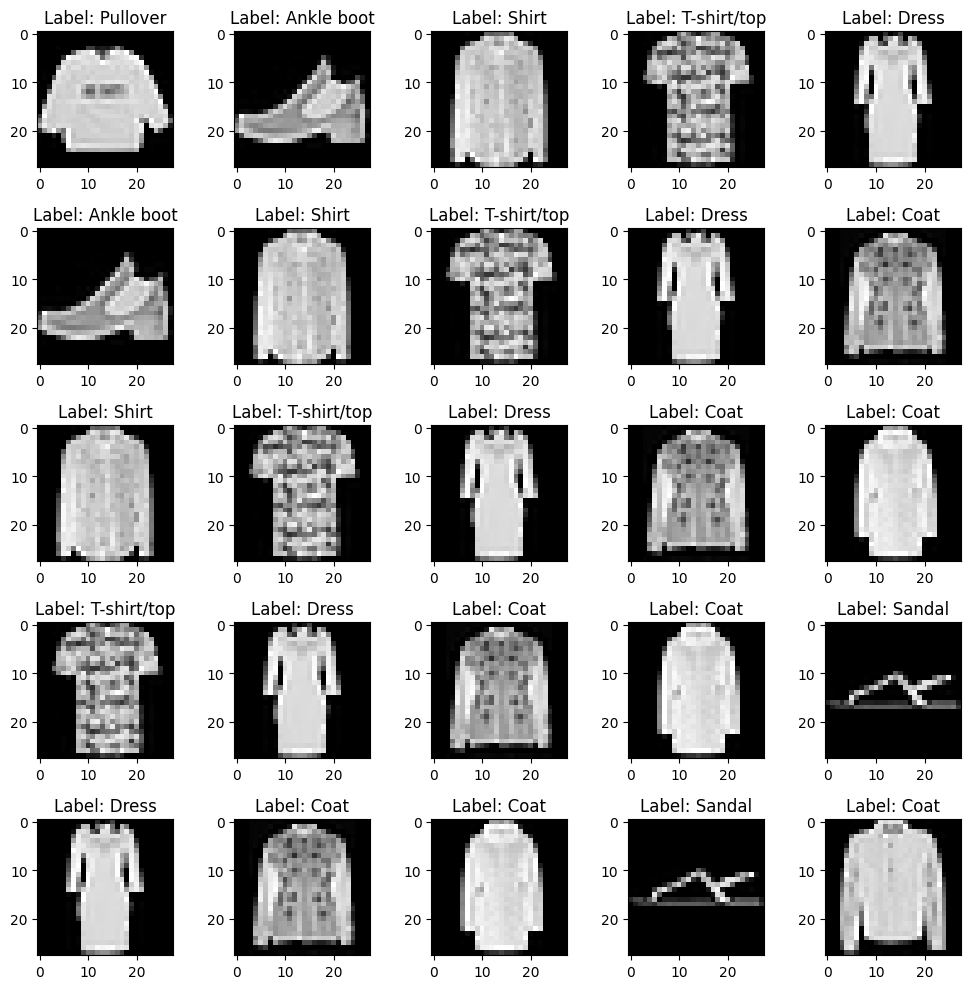

In [77]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Loop over each subplot and add the index (q)
q = 1
for i in range(5):
    for j in range(5):
        
        array = np.array(df.iloc[j+i, 1:-1].values,dtype='uint8')
        array_scaled = (array-np.min(array))/((np.max(array)-np.min(array))) # min-max scaling
        axes[i, j].imshow(array_scaled.reshape(28, 28), cmap='gray')
        axes[i, j].set_title(f'Label: {df.loc[j+i, "Label"]}')

plt.tight_layout()
plt.show()

del fig, axes, array, array_scaled

## Standard Scaling

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$


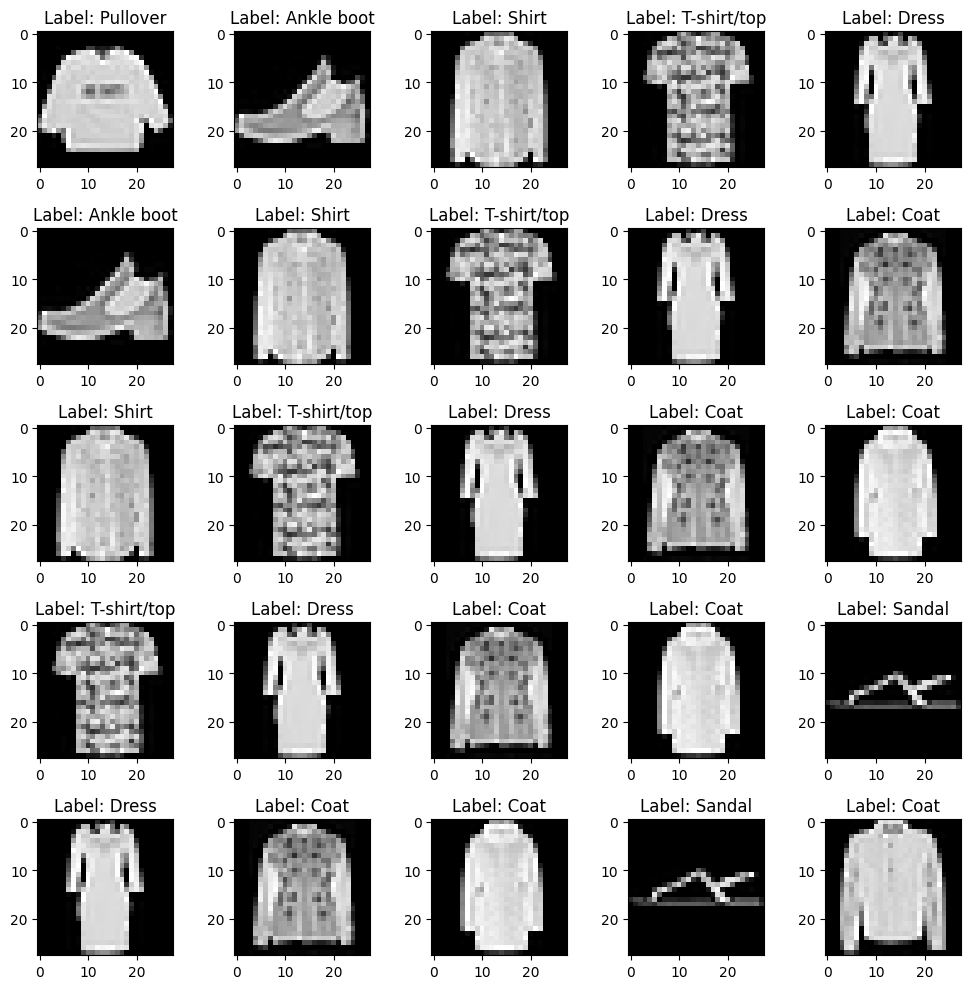

In [78]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))


# Loop over each subplot and add the index (q)
for i in range(5):
    for j in range(5):
        
        array = np.array(df.iloc[j+i, 1:-1].values,dtype='uint8')
        array_scaled = (array-np.mean(array))/(np.std(array)) # standard scaling
        axes[i, j].imshow(array_scaled.reshape(28, 28), cmap='gray')
        axes[i, j].set_title(f'Label: {df.loc[j+i, "Label"]}')

plt.tight_layout()
plt.show()
del fig, axes, array, array_scaled

## Comment:
Min-Max Scaling is better for grayscale image data since the range of pixel values is already fixed between 0 and 255. In this case, the goal is to rescale these values to a new range, such as [0, 1], while preserving the original relationships between the pixel intensities. Min-Max Scaling effectively accomplishes this without distorting the data, making it ideal for tasks like image classification or training neural networks.

Standard Scaling, on the other hand, is better suited when the data contains a wide range of values and potential outliers. However, since grayscale images do not typically contain extreme outliers and are already within a well-defined range, Min-Max Scaling is a more appropriate choice.

## 3 Perform a Principal Component Analysis of the input data following the steps from the Lecture
## Notebook. Comment on the obtained results.

In [96]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.io as pio



def plot_3d_pca(X, y, target_names=None):
    # Apply PCA with 3 components
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Combine the PCA results and target labels
    data = np.column_stack((X_pca, y))

    # Create a DataFrame with column names
    columns = ['PC1', 'PC2', 'PC3', 'label']
    df = pd.DataFrame(data, columns=columns)
    df['label'] = df['label'].astype(int)

    if target_names is not None:
        df['label_name'] = df['label'].apply(lambda x: target_names[x])
        color_col = 'label_name'
    else:
        color_col = 'label'

    # Create the interactive 3D plot
    fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=color_col, symbol=color_col, text=color_col,
                        labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'})

    # Customize the plot appearance
    fig.update_layout(
        margin=dict(l=0, r=0, t=0, b=0),
        scene=dict(
            xaxis_title='Principal Component 1',
            yaxis_title='Principal Component 2',
            zaxis_title='Principal Component 3',
        ),
    )

    # Show the plot
    #fig.show()

    pio.write_html(fig, file="./MLP_gaussian/3d_pca_plot.html", auto_open=True)

    # files.download("3d_pca_plot.html")

    return fig

In [101]:
X = np.array(df.iloc[1:, 1:-1].values,dtype='uint8')
y = np.array(df.iloc[1:, 0].values,dtype='uint8')
fig = plot_3d_pca(X, y, target_names=[0,1,2,3,4,5,6,7,8,9])

## comment
In the 3D PCA analysis of the fashion dataset, we can distinguish three distinct clusters based on item categories:

1. **Upper Body Clothing**: This cluster includes coats, T-shirts, and shirts, which share common characteristics related to upper body fashion.

2. **Bottom Wear**: This cluster encompasses trousers and pants, highlighting the unique attributes that differentiate lower body garments.

3. **Footwear**: This cluster consists of sandals, sneakers, and ankle boots, emphasizing the distinct features of footwear items.

The clear separation of these clusters indicates that PCA effectively captured the fundamental differences between these fashion categories, providing valuable insights for further analysis and classification in fashion-related applications.


## P.3.2  Training MNIST Fashion
Implement a two hidden layer network with the following suggested hyper-parameters (please
notice that you can choose to use your own set of hyper-parameters) and instructions, and plot the resulting
learning curves for the training process (loss and accuracy for both training and validation datasets):
• Hidden Layer Sizes: (2000, 2000)
• Hidden layers activation: ReLU: You can as well explore a activation function of your choice
• output activation: softmax activation. Please use this activation as it is strongly suggested.